# Fourier analysis

In [1]:
infile="../files/moon_weather.csv"

In [79]:
# Tell matplotlib to plot in line
%matplotlib inline

import pandas as pd

# seaborn magically adds a layer of goodness on top of Matplotlib
# mostly this is just changing matplotlib defaults, but it does also
# provide some higher level plotting methods.
import seaborn

# Tell seaborn to set things up
seaborn.set()

from matplotlib import pyplot

import mpld3

mpld3.enable_notebook()

In [6]:
import numpy
from numpy import fft

In [4]:
data = pd.read_csv(infile, index_col='date', parse_dates=['date'])


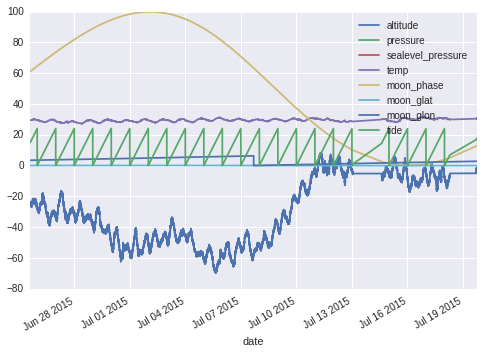

In [5]:
data.plot()

In [88]:
data.describe()

altitude  pressure  sealevel_pressure          temp    moon_phase  \
count  30397.000000         0                  0  30397.000000  30397.000000   
mean     -31.879161       NaN                NaN     29.392555     58.143320   
std       20.589351       NaN                NaN      0.894486     36.001448   
min      -69.792586       NaN                NaN     27.200000      0.172035   
25%      -50.325302       NaN                NaN     28.700000     22.124449   
50%      -34.975717       NaN                NaN     29.400000     69.537071   
75%      -10.941520       NaN                NaN     30.000000     91.296631   
max        8.379000       NaN                NaN     31.500000     99.811104   

          moon_glat     moon_glon          tide  
count  30397.000000  30397.000000  30397.000000  
mean       0.009210      3.272469     12.141895  
std        0.063526      1.943755      6.996605  
min       -0.087831      0.000126     -0.087386  
25%       -0.062341      1.274654      5.998249  
50%        0.026644      3.743553     12.296909  
75%        0.070193      4.961365     18.230285  
max        0.087505      6.283139     24.070675

In [89]:
N = 30000
xx = fft.fft(data[:N].altitude)

In [60]:
a = xx[0]
a.real

-389209.99002506526

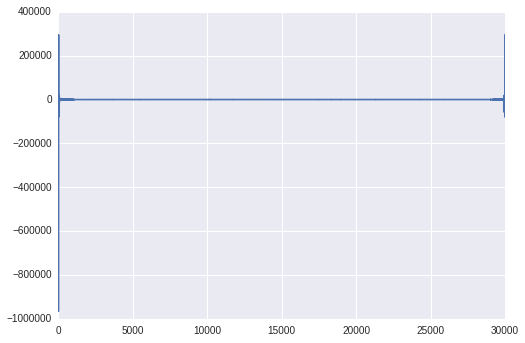

In [91]:
pd.Series(x.real for x in xx)[:].plot()

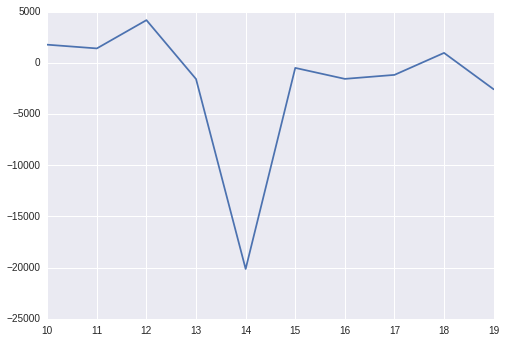

In [67]:
pd.Series(x.real for x in xx)[10:20].plot()

In [95]:
p = 42
print("%8.3f %s" % (N/p, "minutes"))
print("%8.3f %s" % (N/(p * 60), "hours"))
print("%8.3f %s" % (N/(p * 60 * 24), "days"))


 714.286 minutes
  11.905 hours
   0.496 days


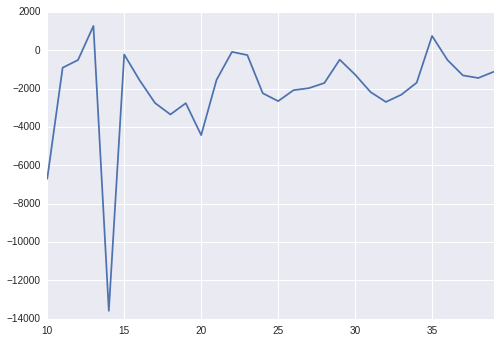

In [75]:
pd.Series(x.imag for x in xx)[10:40].plot()

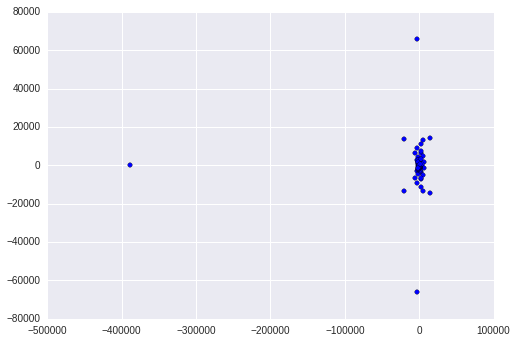

In [82]:
pyplot.scatter([x.real for x in xx], [x.imag for x in xx])

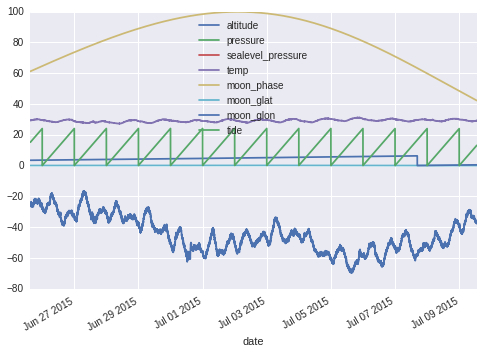

In [64]:
data[:20000].plot()

In [42]:
data.describe()

altitude  pressure  sealevel_pressure          temp    moon_phase  \
count  30397.000000         0                  0  30397.000000  30397.000000   
mean     -31.879161       NaN                NaN     29.392555     58.143320   
std       20.589351       NaN                NaN      0.894486     36.001448   
min      -69.792586       NaN                NaN     27.200000      0.172035   
25%      -50.325302       NaN                NaN     28.700000     22.124449   
50%      -34.975717       NaN                NaN     29.400000     69.537071   
75%      -10.941520       NaN                NaN     30.000000     91.296631   
max        8.379000       NaN                NaN     31.500000     99.811104   

          moon_glat     moon_glon          tide  
count  30397.000000  30397.000000  30397.000000  
mean       0.009210      3.272469     12.141895  
std        0.063526      1.943755      6.996605  
min       -0.087831      0.000126     -0.087386  
25%       -0.062341      1.274654      5.998249  
50%        0.026644      3.743553     12.296909  
75%        0.070193      4.961365     18.230285  
max        0.087505      6.283139     24.070675

In [29]:
import math
sine = [numpy.sin(x/math.pi) for x in range(1000)]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb69242f28>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ffb69378f98>], dtype=object)

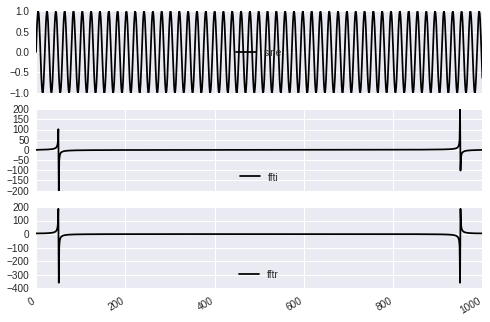

In [101]:
xfft = fft.fft(sine)

df = pd.DataFrame()
df['sine'] =sine
df['ffti'] = [x.imag for x in xfft]
df['fftr'] = [x.real for x in xfft]
df[:].plot(subplots=True)

In [100]:
df.describe()

sine           fft
count  1000.000000  1.000000e+03
mean      0.005197 -5.684342e-17
std       0.706704  1.081976e+01
min      -0.999981 -1.990662e+02
25%      -0.699680 -4.233174e-01
50%       0.012879 -5.190293e-15
75%       0.709885  4.233174e-01
max       0.999983  1.990662e+02

In [99]:
df.head(20)

sine       fft
0   0.000000  0.000000
1   0.312962  0.052948
2   0.594481  0.106019
3   0.816273  0.159337
4   0.956056  0.213027
5   0.999785  0.267219
6   0.943067  0.322045
7   0.791600  0.377643
8   0.560603  0.434158
9   0.273282  0.491741
10 -0.041494  0.550553
11 -0.352102  0.610767
12 -0.627335  0.672567
13 -0.839540  0.736151
14 -0.967398  0.801737
15 -0.998063  0.869561
16 -0.928453  0.939881
17 -0.765564  1.012983
18 -0.525759  1.089186
19 -0.233132  1.168842

$$A_k =  \sum_{m=0}^{n-1} a_m \exp\left\{-2\pi i{mk \over n}\right\}
   \qquad k = 0,\ldots,n-1.$$

$$a_m = \exp\{2\pi i\,f m\Delta t\}$$

where $\Delta t$ is the sampling interval

In [102]:
fft?